Build a model that predicts whether a player will have an NBA career lasting five years or more

# Imports

In [1]:
import pandas as pd
from sklearn import naive_bayes
from sklearn import model_selection
from sklearn import metrics

<ipython-input-1-693ade53b3ec>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
extracted_data = pd.read_csv('extracted_nba_players.csv')

In [5]:
extracted_data.head(10)

,fg,3p,ft,reb,ast,stl,blk,tov,target_5yrs,total_points,efficiency
0,34.7,25.0,69.9,4.1,1.9,0.4,0.4,1.3,0,266.4,9.722628
1,29.6,23.5,76.5,2.4,3.7,1.1,0.5,1.6,0,252.0,9.368030
2,42.2,24.4,67.0,2.2,1.0,0.5,0.3,1.0,0,384.8,25.150327
3,42.6,22.6,68.9,1.9,0.8,0.6,0.1,1.0,1,330.6,28.500000
4,52.4,0.0,67.4,2.5,0.3,0.3,0.4,0.8,1,216.0,18.782609
5,42.3,32.5,73.2,0.8,1.8,0.4,0.0,0.7,0,277.5,24.342105
6,43.5,50.0,81.1,2.0,0.6,0.2,0.1,0.7,1,409.2,37.541284
7,41.5,30.0,87.5,1.7,0.2,0.2,0.1,0.7,1,273.6,26.563107
8,39.2,23.3,71.4,0.8,2.3,0.3,0.0,1.1,0,156.0,15.757576
9,38.3,21.4,67.8,1.1,0.3,0.2,0.0,0.7,0,155.4,18.282353


# Model Prep

In [6]:
y = extracted_data["target_5yrs"]
x = extracted_data.drop("target_5yrs",axis=1)

In [7]:
y.head(10)

0    0
1    0
2    0
3    1
4    1
5    0
6    1
7    1
8    0
9    0
Name: target_5yrs, dtype: int64

In [8]:
x.head(10)

,fg,3p,ft,reb,ast,stl,blk,tov,total_points,efficiency
0,34.7,25.0,69.9,4.1,1.9,0.4,0.4,1.3,266.4,9.722628
1,29.6,23.5,76.5,2.4,3.7,1.1,0.5,1.6,252.0,9.368030
2,42.2,24.4,67.0,2.2,1.0,0.5,0.3,1.0,384.8,25.150327
3,42.6,22.6,68.9,1.9,0.8,0.6,0.1,1.0,330.6,28.500000
4,52.4,0.0,67.4,2.5,0.3,0.3,0.4,0.8,216.0,18.782609
5,42.3,32.5,73.2,0.8,1.8,0.4,0.0,0.7,277.5,24.342105
6,43.5,50.0,81.1,2.0,0.6,0.2,0.1,0.7,409.2,37.541284
7,41.5,30.0,87.5,1.7,0.2,0.2,0.1,0.7,273.6,26.563107
8,39.2,23.3,71.4,0.8,2.3,0.3,0.0,1.1,156.0,15.757576
9,38.3,21.4,67.8,1.1,0.3,0.2,0.0,0.7,155.4,18.282353


In [9]:
x_train,x_test,y_train,y_test=model_selection.train_test_split(x,y, test_size=0.25, random_state=0)

In [10]:

print(x_train.shape)

print(x_test.shape)

print(y_train.shape)

print(y_test.shape)

(1005, 10)
(335, 10)
(1005,)
(335,)


# Model Building

In [11]:
nb = naive_bayes.GaussianNB()

nb.fit(x_train,y_train)

y_pred = nb.predict(x_test)

# Results and Evaluation

In [12]:
print("accuracy score:"), print(metrics.accuracy_score(y_test,y_pred))

print("precision score:"), print(metrics.precision_score(y_test,y_pred))

print("recall score:"), print(metrics.recall_score(y_test,y_pred))

print("F1 score:"), print(metrics.f1_score(y_test,y_pred))

accuracy score:
0.6985074626865672
precision score:
0.8211920529801324
recall score:
0.6262626262626263
F1 score:
0.7106017191977078


(None, None)

In [14]:
import matplotlib.pyplot as plt
%pip install seaborn
import seaborn as sns

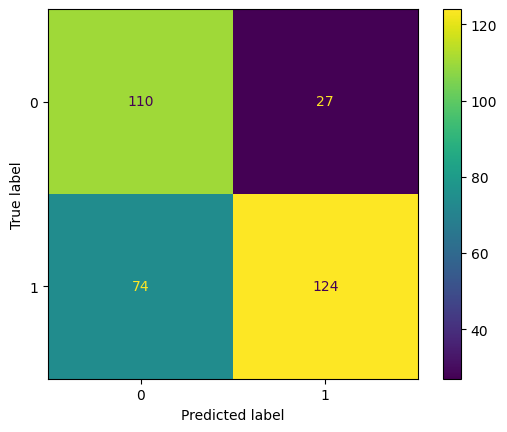

In [16]:

cm = metrics.confusion_matrix(y_test,y_pred)

disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb.classes_)

disp.plot()